# cadCAD Experiment

In [1]:
import matplotlib.pyplot as plt
from model.run import run

df = run()

print(df)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (90, 7, 1, 5)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 0.15s
     allocated_funds  unallocated_funds  \
8         156.770907         156.770907   
16        166.186272         166.186272   
24        167.711293         167.711293   
32        139.831894         164.831894   
40        166.500202         166.500202   
..               ...                ...   
688       126.001523         150.501523   
696       148.581990         155.081990   
704       130.520342         150.687009   
712       150.423727         150.423727   
720       157.182215         157.1

Text(0, 0.5, 'Broker Holdings')

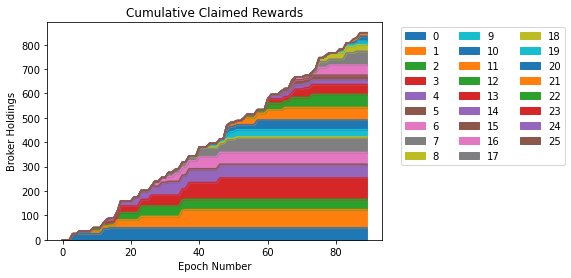

In [2]:
import pandas as pd
df1 = df.reset_index().brokers

broker_holdings = {}
timestep = 0
for broker_dict in df1:
    for broker_id, broker in broker_dict.items():
        if broker_id not in broker_holdings:
            broker_holdings[broker_id] = {}
        broker_holdings[broker_id][timestep] = broker.holdings
        
    timestep += 1

df_plot = pd.DataFrame(broker_holdings)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(1.3, 1), ncol=3)
plt.title('Cumulative Claimed Rewards')
plt.xlabel('Epoch Number')
plt.ylabel('Broker Holdings')

Text(0, 0.5, 'Broker Claimable Funds')

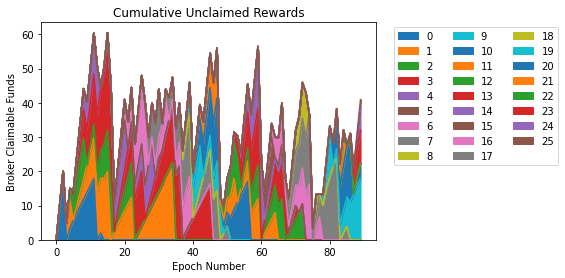

In [3]:
import pandas as pd
df1 = df.reset_index().brokers

broker_claimable = {}
timestep = 0
for broker_dict in df1:
    for broker_id, broker in broker_dict.items():
        if broker_id not in broker_claimable:
            broker_claimable[broker_id] = {}
        broker_claimable[broker_id][timestep] = broker.claimable_funds
        
    timestep += 1

df_plot = pd.DataFrame(broker_claimable)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(1.3, 1), ncol=3)
plt.title('Cumulative Unclaimed Rewards')
plt.xlabel('Epoch Number')
plt.ylabel('Broker Claimable Funds')

<AxesSubplot:xlabel='timestep'>

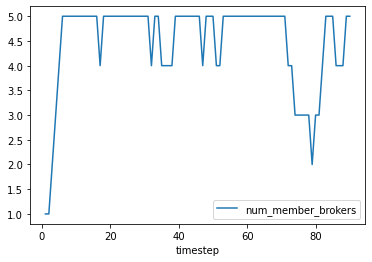

In [4]:
df.plot(x='timestep',y='num_member_brokers')

In [5]:
df['members'] = df.brokers.apply(lambda x: [v.id for v in x.values() if v.member])

In [6]:
df.members

8                       [0]
16                      [0]
24                   [0, 1]
32                [0, 1, 2]
40             [0, 1, 2, 3]
               ...         
688        [17, 19, 20, 23]
696        [19, 20, 23, 24]
704        [19, 20, 23, 24]
712    [19, 20, 23, 24, 25]
720    [19, 20, 23, 24, 25]
Name: members, Length: 90, dtype: object

In [7]:
broker_ids = [v.id for v in df.brokers.values[-1].values()]

In [8]:
df['broker_stakes'] = df.brokers.apply(lambda x: [(v.member, v.stake) for v in x.values()])

In [9]:
def check(x):
    if x[0]:
        if x[1]==5:
            #return "member with correct stake"
            return True
        else:
            #return "member with incorrect stake"
            return False
    else:
        if x[1]==0:
            #return "nonmember with correct stake"
            return True
        else:
            #return "nonmember with incorrect stake"
            return False

In [10]:
df.broker_stakes.apply(lambda z: [check(x) for x in z])  

8                                                 [True]
16                                                [True]
24                                          [True, True]
32                                    [True, True, True]
40                              [True, True, True, True]
                             ...                        
688    [True, True, True, True, True, True, True, Tru...
696    [True, True, True, True, True, True, True, Tru...
704    [True, True, True, True, True, True, True, Tru...
712    [True, True, True, True, True, True, True, Tru...
720    [True, True, True, True, True, True, True, Tru...
Name: broker_stakes, Length: 90, dtype: object

In [11]:
df['broker_based_total_stake'] = df.broker_stakes.apply(lambda z: sum([x[1] for x in z if x[0]]))

In [12]:
df['broker_based_total_stake']

8       5
16      5
24     10
32     15
40     20
       ..
688    20
696    20
704    20
712    25
720    25
Name: broker_based_total_stake, Length: 90, dtype: int64